In [30]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import random

In [31]:
# City
# city = 'helsinki'
# city = 'berlin'
# city = 'paris'
# city = 'toulouse'
# city = 'lisbon'
# city = 'prague'
## city = 'athens'
# city = 'rome'
# city = 'rennes'
# city = 'venice'
# city = 'sydney'
# city = 'brisbane'
# city = 'bordeaux'
city = 'luxembourg'

# route_type = 'bus'
# route_type = 'combined'
# route_type = 'ferry'
# route_type = 'subway'
# route_type = 'walk'
# route_type = 'tram'
route_type = 'rail'


# Dataframe
data1 = pd.read_csv(f'data/{city}/network_{route_type}.csv', sep=';')

# Node Names
data2 = pd.read_csv(f'data/{city}/network_nodes.csv', sep=';')

# Get 'From' Node Name
data = pd.merge(data1, data2, how='inner', left_on= 'from_stop_I', right_on='stop_I')

# Get 'TO' Node Name
data = pd.merge(data, data2, how='inner', left_on= 'to_stop_I', right_on='stop_I')

# Drop columnns we don't need
df = data.drop(['n_vehicles', 
                'route_I_counts', 
                'stop_I_x', 
                'lat_x', 
                'lon_x', 
                'stop_I_y', 
                'lat_y', 
                'lon_y'], axis=1)

# Rename columns
df = df.rename({'name_x' : 'from_name', 'name_y' : 'to_name'}, axis=1)

# Clean some data
if (city == 'brisbane' and route_type == 'ferry'):
    df['from_name'].replace(' ferry terminal','',inplace=True, regex=True)
    df['to_name'].replace(' ferry terminal','',inplace=True, regex=True)
    
if (city == 'luxembourg' and route_type == 'rail'):
    df['from_name'].replace(', Gare','',inplace=True, regex=True)
    df['from_name'].replace(', Gare-Usines','',inplace=True, regex=True)

    df['to_name'].replace(', Gare','',inplace=True, regex=True)
    df['to_name'].replace(', Gare-Usines','',inplace=True, regex=True)

In [32]:
data.head()

,from_stop_I,to_stop_I,d,duration_avg,n_vehicles,route_I_counts,stop_I_x,lat_x,lon_x,name_x,stop_I_y,lat_y,lon_y,name_y
0,1601,1616,306,61.500000,40,"172:34,68:5,311:1",1601,49.48053,6.08246,"Dudelange-Centre, Gare",1616,49.48326,6.08296,"Dudelange, Gare"
1,1592,1616,1078,118.461538,39,"172:34,68:4,311:1",1592,49.49267,6.08650,"Dudelange-Burange, Gare",1616,49.48326,6.08296,"Dudelange, Gare"
2,1601,1618,932,61.538462,39,"172:34,68:4,311:1",1601,49.48053,6.08246,"Dudelange-Centre, Gare",1618,49.47244,6.07910,"Dudelange, Gare-Usines"
3,407,1618,1727,180.000000,39,"172:34,68:4,311:1",407,49.45692,6.07903,"Volmerange-les-Mines, Gare",1618,49.47244,6.07910,"Dudelange, Gare-Usines"
4,1730,2529,3602,180.000000,40,"104:19,220:1,12:1,158:19",1730,49.75199,6.11035,"Mersch, Gare",2529,49.72069,6.12308,"Lintgen, Gare"


In [33]:
df.head()

,from_stop_I,to_stop_I,d,duration_avg,from_name,to_name
0,1601,1616,306,61.500000,Dudelange-Centre,Dudelange
1,1592,1616,1078,118.461538,Dudelange-Burange,Dudelange
2,1601,1618,932,61.538462,Dudelange-Centre,Dudelange-Usines
3,407,1618,1727,180.000000,Volmerange-les-Mines,Dudelange-Usines
4,1730,2529,3602,180.000000,Mersch,Lintgen


In [34]:
G = nx.from_pandas_edgelist(df, source='from_name', target='to_name', edge_attr='d')

# Obtener la componente conexa más grande
S = G.subgraph(max(nx.connected_components(G), key=len)).copy()

print(f'Número de nodos = { nx.number_of_nodes(G) }')
print(f'Número de enlaces = { nx.number_of_edges(G) }')
print(f'Número de componentes = { nx.number_connected_components(G) }')

if (nx.is_connected(G)):
    print(f'Tamaño de la componente conexa = { nx.diameter(G) }')
    print(f'Camino mínimo promedio = { nx.average_shortest_path_length(G) }')
    print(f'Densidad = { nx.density(G) }')
    print(f'Coeficiente de clustering promedio = { nx.average_clustering(G) }')

    degree = nx.degree_centrality(G)
    betweeness = nx.betweenness_centrality(G)
    closeness = nx.closeness_centrality(G)

else:
    print(f'Tamaño de la componente conexa más grande = { nx.diameter(S) }')
    print(f'Camino mínimo promedio = { nx.average_shortest_path_length(S) }')
    print(f'Densidad = { nx.density(S) }')
    print(f'Coeficiente de clustering promedio = { nx.average_clustering(S) }')
    degree = nx.degree_centrality(G)
    betweeness = nx.betweenness_centrality(G)
    closeness = nx.closeness_centrality(G)   

# Get measures of centrality
dfDegree = pd.DataFrame.from_dict(degree, orient='index', columns=['degree_centrality'])
dfBetween = pd.DataFrame.from_dict(betweeness, orient='index', columns=["betweenness_centrality"])
dfCloseness = pd.DataFrame.from_dict(closeness, orient='index', columns=["closeness_centrality"])

# Print top 10
print (dfDegree.sort_values(by='degree_centrality', ascending=False).head(10))
print (dfBetween.sort_values(by='betweenness_centrality', ascending=False).head(10))
print (dfCloseness.sort_values(by='closeness_centrality', ascending=False).head(10))

Número de nodos = 43
Número de enlaces = 56
Número de componentes = 1
Tamaño de la componente conexa = 12
Camino mínimo promedio = 4.761904761904762
Densidad = 0.06201550387596899
Coeficiente de clustering promedio = 0.21959126145172658
                     degree_centrality
Luxembourg Centrale           0.261905
Dippach-Reckange              0.095238
Dommeldange                   0.095238
Munsbach                      0.095238
Mersch                        0.095238
Sandweiler-Contern            0.095238
Bettembourg                   0.095238
Hollerich                     0.071429
Bascharage/Sanem              0.071429
Esch/Alzette                  0.071429
                     betweenness_centrality
Luxembourg Centrale                0.757259
Bettembourg                        0.547038
Noertzange                         0.396051
Schifflange                        0.250871
Esch/Alzette                       0.219512
Dudelange-Burange                  0.176539
Bertrange-Strassen        

In [35]:
# For debug only
# seed = random.randint(1,50)
# print(seed)
seed = 47

In [36]:
def makeGraph(seed, G, color='lightblue', nodeLabels=False, nodeWeight=False):
    
    pos = nx.spring_layout(G, seed=seed)
    edge_labels = nx.get_edge_attributes(G, "d")

    plt.figure(figsize=(15,15))
    nx.draw(G, pos, with_labels=False, node_color=color, node_size=900)
    if nodeWeight:
        nx.draw_networkx_edge_labels(G, pos, edge_labels)
    if nodeLabels:
        nx.draw_networkx_labels(G, pos, font_size=15)

    plt.show()

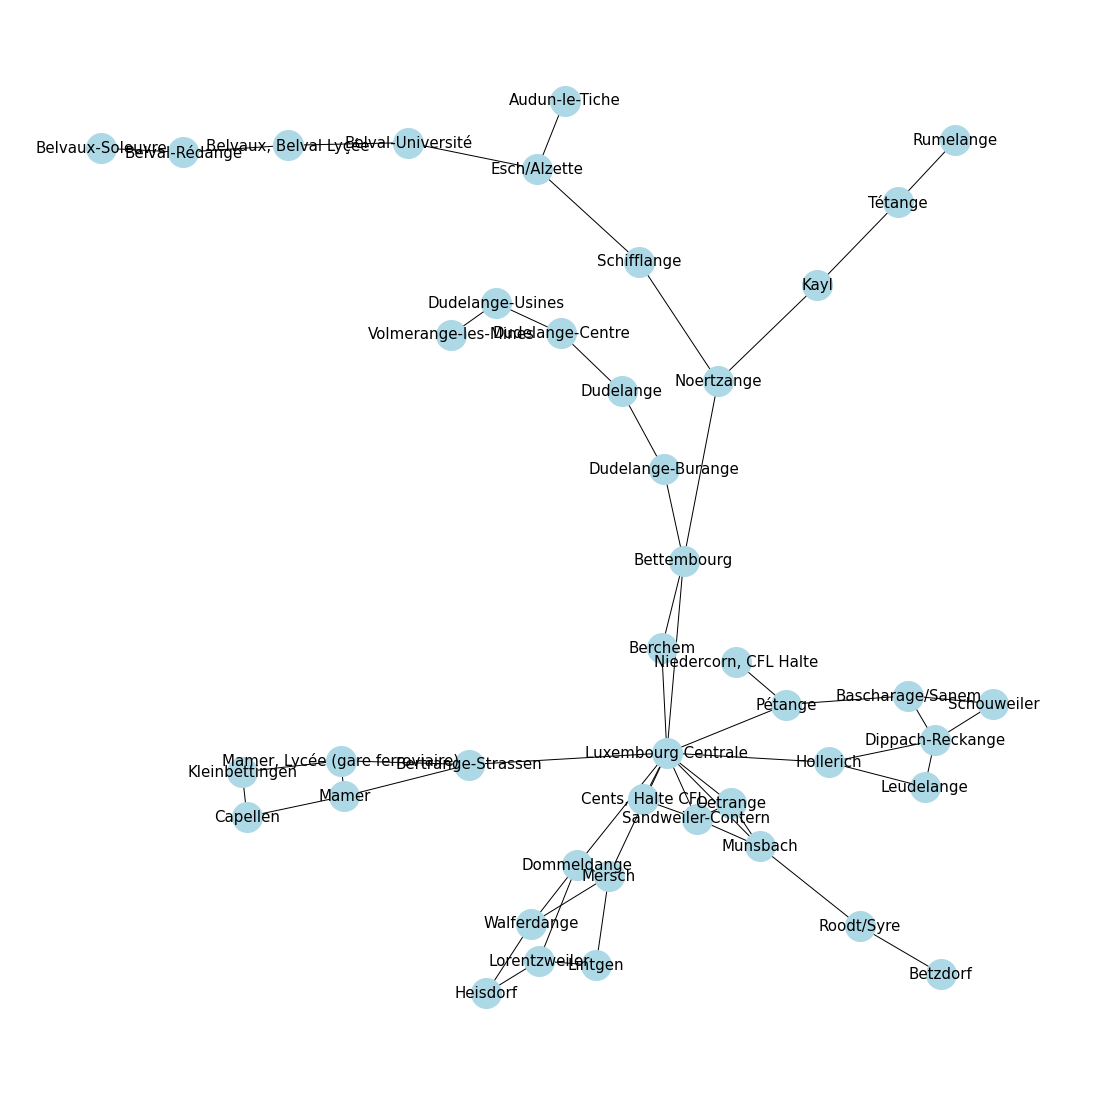

In [37]:
# Grafo con Nombres en los Nodos
makeGraph(47, G, nodeLabels=True)

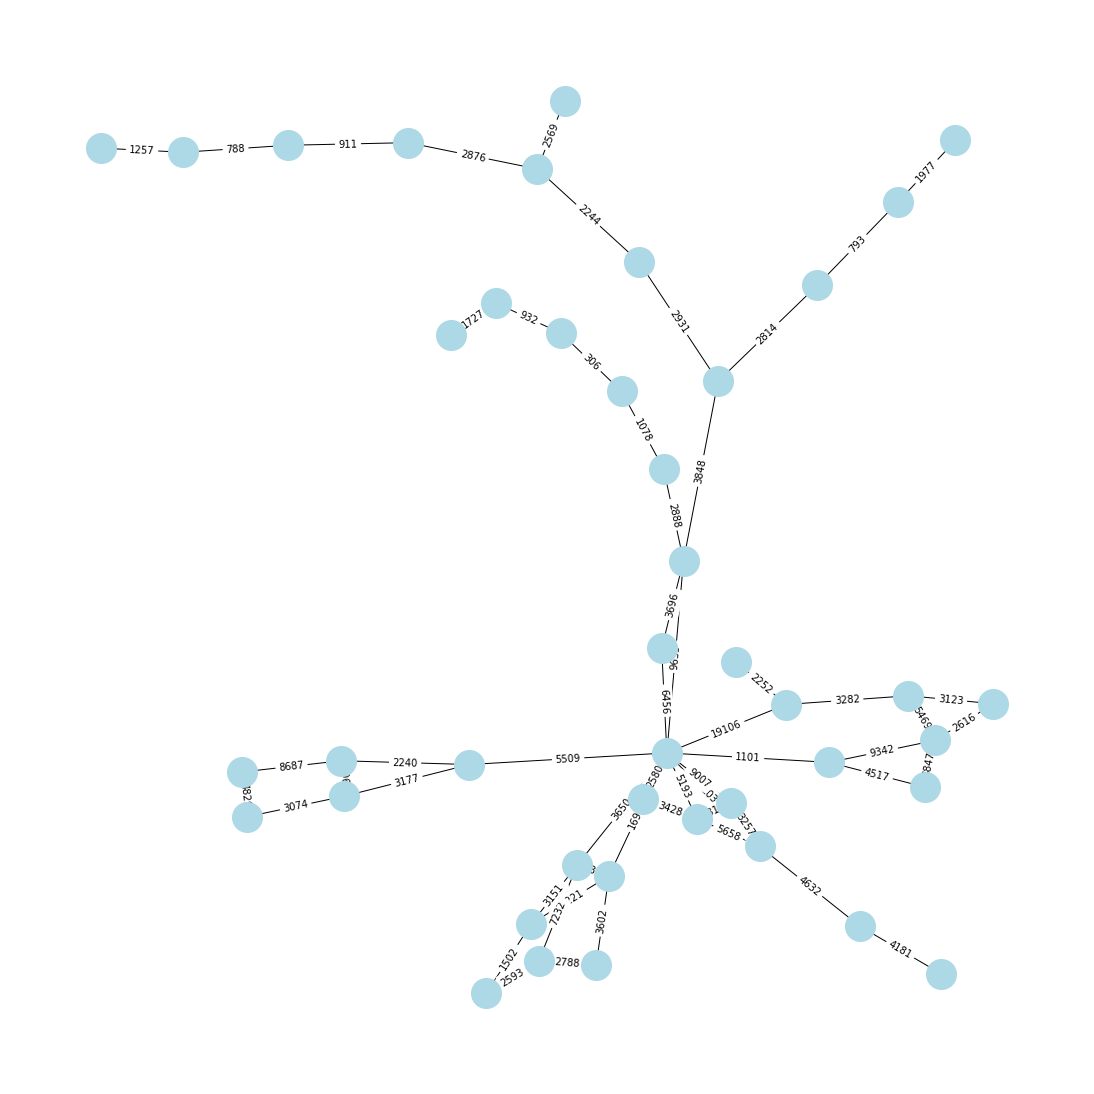

In [38]:
# Grafo sin Nombres y peso en los bordes
makeGraph(47, G, nodeWeight=True)

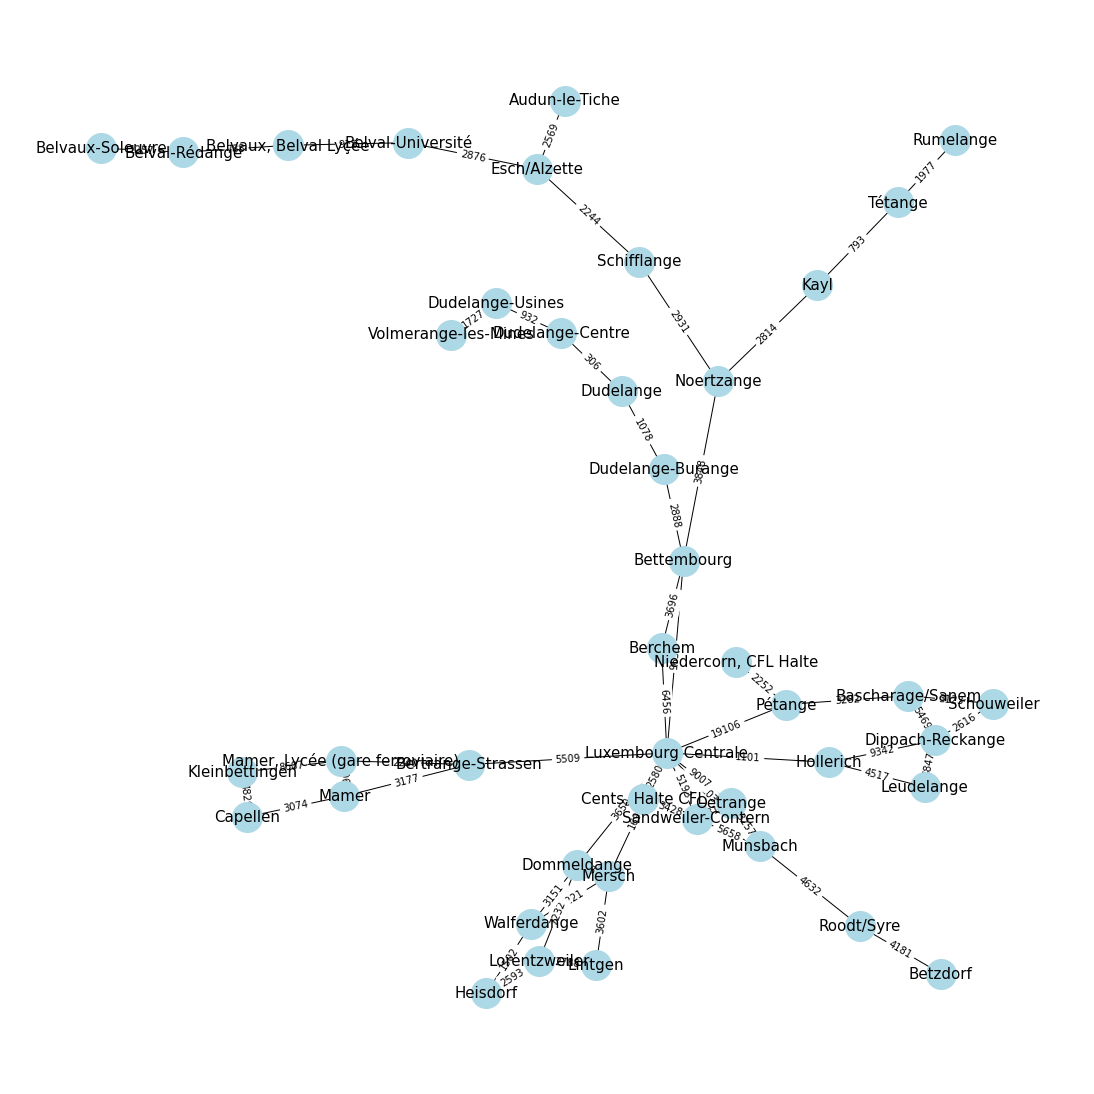

In [39]:
# Grafo con Nombres y peso en los bordes
makeGraph(47, G, nodeLabels=True, nodeWeight=True)

In [40]:
G = nx.from_pandas_edgelist(df, source='from_stop_I', target='to_stop_I', edge_attr='d')

# Obtener la componente conexa más grande
S = G.subgraph(max(nx.connected_components(G), key=len)).copy()

print(f'Número de nodos = { nx.number_of_nodes(G) }')
print(f'Número de enlaces = { nx.number_of_edges(G) }')
print(f'Número de componentes = { nx.number_connected_components(G) }')

if (nx.is_connected(G)):
    print(f'Tamaño de la componente conexa = { nx.diameter(G) }')
    print(f'Camino mínimo promedio = { nx.average_shortest_path_length(G) }')
    print(f'Densidad = { nx.density(G) }')
    print(f'Coeficiente de clustering promedio = { nx.average_clustering(G) }')

    degree = nx.degree_centrality(G)
    betweeness = nx.betweenness_centrality(G)
    closeness = nx.closeness_centrality(G)

else:
    print(f'Tamaño de la componente conexa más grande = { nx.diameter(S) }')
    print(f'Camino mínimo promedio = { nx.average_shortest_path_length(S) }')
    print(f'Densidad = { nx.density(S) }')
    print(f'Coeficiente de clustering promedio = { nx.average_clustering(S) }')
    degree = nx.degree_centrality(G)
    betweeness = nx.betweenness_centrality(G)
    closeness = nx.closeness_centrality(G)

# Get measures of centrality
dfDegree = pd.DataFrame.from_dict(degree, orient='index', columns=['degree_centrality'])
dfBetween = pd.DataFrame.from_dict(betweeness, orient='index', columns=["betweenness_centrality"])
dfCloseness = pd.DataFrame.from_dict(closeness, orient='index', columns=["closeness_centrality"])

# Print top 10
print (dfDegree.sort_values(by='degree_centrality', ascending=False).head(10))
print (dfBetween.sort_values(by='betweenness_centrality', ascending=False).head(10))
print (dfCloseness.sort_values(by='closeness_centrality', ascending=False).head(10))

Número de nodos = 43
Número de enlaces = 56
Número de componentes = 1
Tamaño de la componente conexa = 12
Camino mínimo promedio = 4.761904761904762
Densidad = 0.06201550387596899
Coeficiente de clustering promedio = 0.21959126145172658
      degree_centrality
1393           0.261905
2262           0.095238
953            0.095238
2200           0.095238
1730           0.095238
1195           0.095238
268            0.095238
49             0.071429
1944           0.071429
2267           0.071429
      betweenness_centrality
1393                0.757259
268                 0.547038
2316                0.396051
1426                0.250871
2267                0.219512
1592                0.176539
360                 0.176539
1616                0.135889
463                 0.135889
1375                0.110337
      closeness_centrality
1393              0.355932
268               0.333333
2220              0.295775
2316              0.285714
1730              0.278146
360               

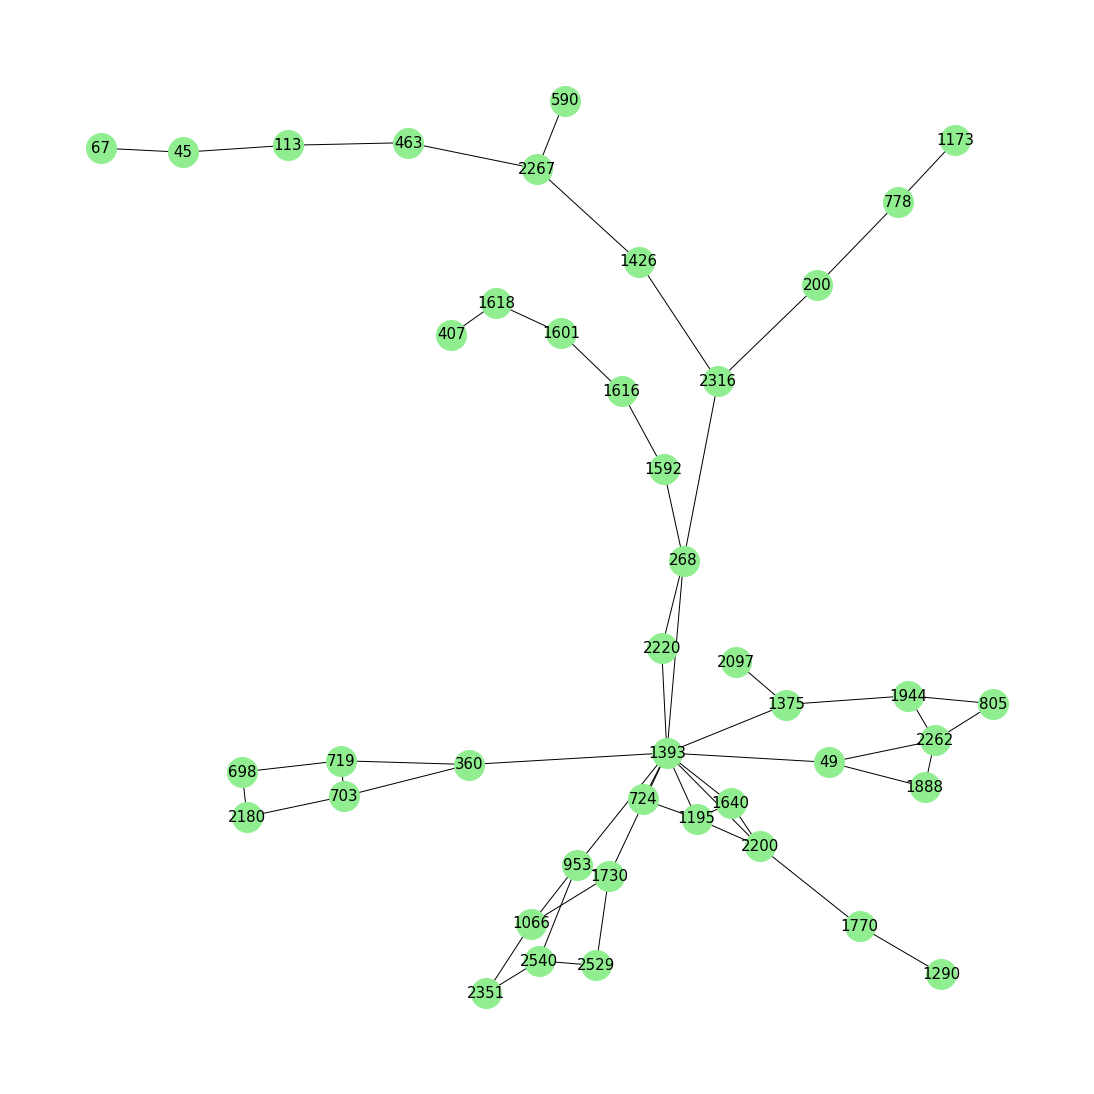

In [41]:
# Grafo con Nombres en los Nodos
makeGraph(47, G, 'lightgreen', nodeLabels=True)

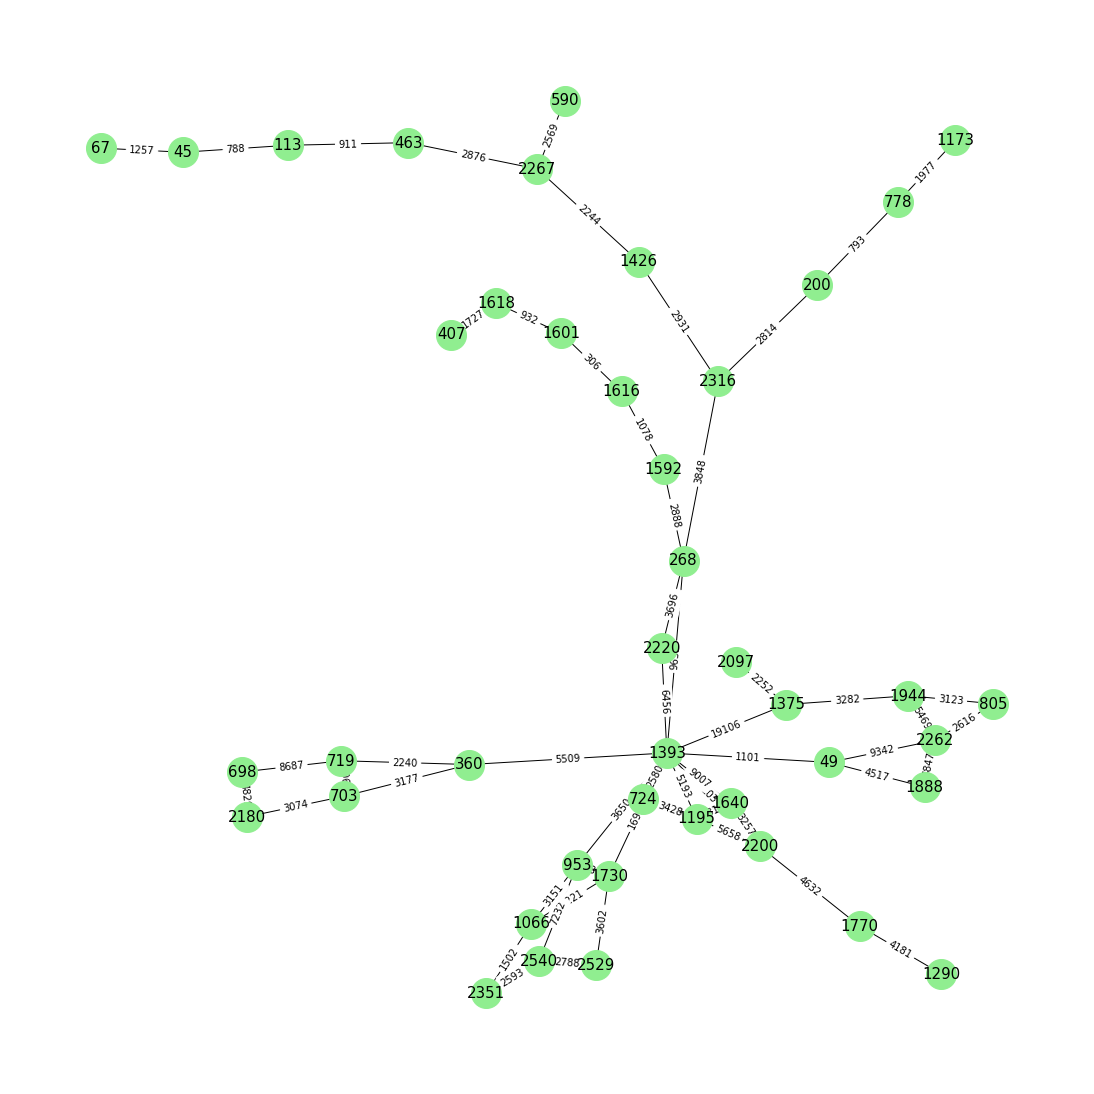

In [42]:
# Grafo con Nombres y peso en los bordes
makeGraph(47, G, 'lightgreen', nodeLabels=True, nodeWeight=True)

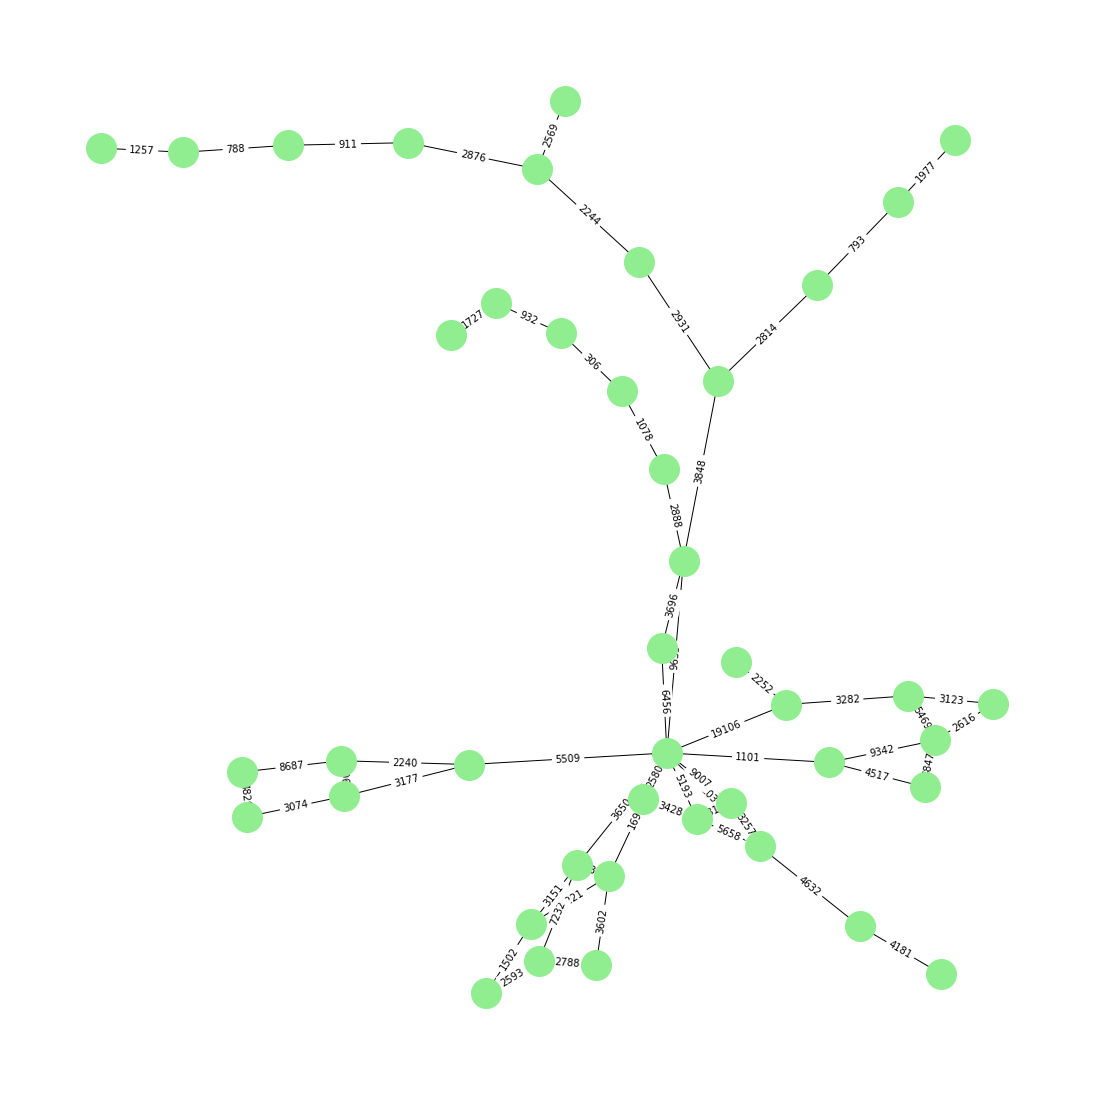

In [43]:
# Grafo sin Nombres y peso en los bordes
makeGraph(47, G, 'lightgreen', nodeWeight=True)